### Building a regressor model

In [2]:
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
housing_df = fetch_california_housing()
x_train, x_test, y_train, y_test = train_test_split(housing_df.data, housing_df.target)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


In [4]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale  = scaler.transform(x_test)

In [7]:
model = keras.models.Sequential([keras.layers.Dense(30, activation=keras.activations.relu,input_shape=x_train_scale.shape[1:]),
keras.layers.Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD())
history = model.fit(x_train_scale, y_train, epochs=4, validation_split=0.1)

Epoch 1/4
436/436 [==============================] - 1s 1ms/step - loss: 0.7983 - val_loss: 0.8859
Epoch 2/4
436/436 [==============================] - 0s 1ms/step - loss: 0.4954 - val_loss: 0.5551
Epoch 3/4
436/436 [==============================] - 1s 1ms/step - loss: 0.4652 - val_loss: 0.7330
Epoch 4/4
436/436 [==============================] - 0s 1ms/step - loss: 0.4484 - val_loss: 0.4359


In [11]:
model.evaluate(x_test_scale, y_test)

162/162 [==============================] - 0s 666us/step - loss: 0.4482


0.44823282957077026

In [13]:
model.evaluate(x_test, y_test) # This won't give correct metric because x_test is at large scale

162/162 [==============================] - 0s 407us/step - loss: 32054.4434


32054.443359375

In [18]:
model.predict(x_test_scale[[0]])

array([[1.8975533]], dtype=float32)

In [28]:
model.predict(x_test_scale[:10]).reshape(-1)

array([1.8975531 , 1.255616  , 1.1537129 , 1.3507696 , 3.1882176 ,
       2.5697527 , 0.94126177, 3.069664  , 1.63647   , 0.6460767 ],
      dtype=float32)

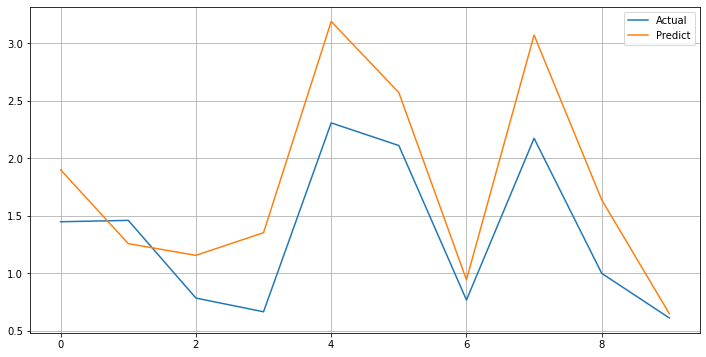

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame({"Actual":y_test[:10], "Predict":model.predict(x_test_scale[:10]).reshape(-1)}).plot(figsize=(12,6))
plt.grid()
plt.show()
